In [1]:
import matplotlib.pyplot as plt

import os, sys
parent = os.path.abspath('../..')

if not parent in sys.path: sys.path.append(parent)

from src.utilities import *
from src.pairings import *
from src.pagerank.pagerank import *

In [15]:
N = 500
budget = range(1000, 20000, 1000)

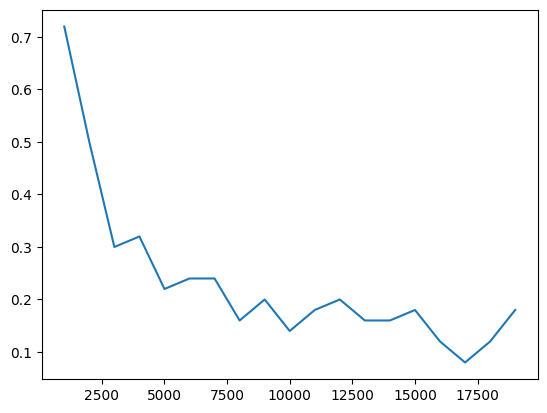

In [17]:
L = [PageRank(N, b, Random, p=1).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

In [30]:
PageRank(N, 15_000, Random, p=0.9).score()

0.6599999999999999

Text(0.5, 1.0, 'p=0.9')

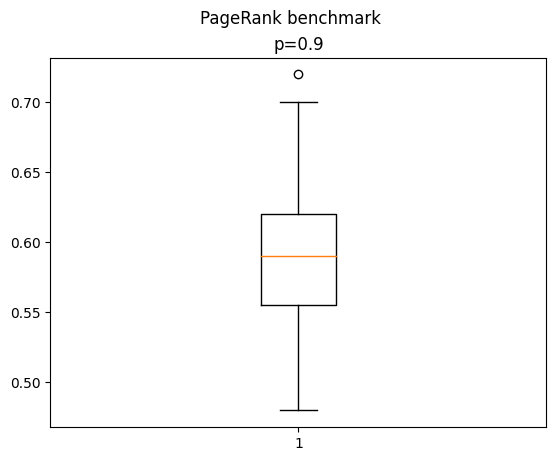

In [31]:
L = [PageRank(N, 15_000, Random, p=0.9).score() for _ in range(40)]

fig, axes = plt.subplots(1, 1,)
fig.suptitle('PageRank benchmark')

axes.boxplot(L)
axes.set_title('p=0.9')

In [9]:
b = 15000

L1 = [PageRank(N, b, Random, p=0.9).score() for _ in range(40)]
L2 = [PageRank(N, b, RandomCycles, p=0.9).score() for _ in range(40)]
L3 = [IteratedPageRank(N, b, p=0.9).score() for _ in range(40)]

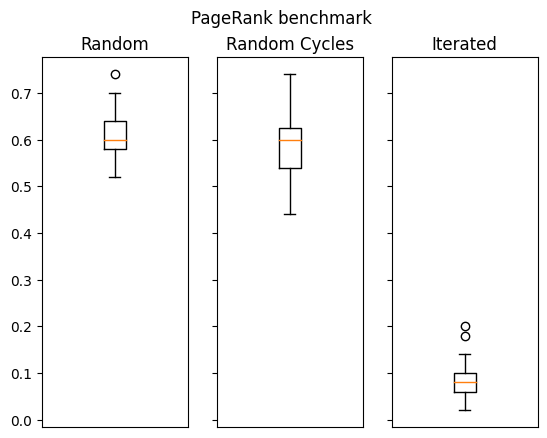

In [32]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.suptitle('PageRank benchmark')

axes[0].boxplot(L1)
axes[0].set_title('Random')

axes[1].boxplot(L2)
axes[1].set_title('Random Cycles')

axes[2].boxplot(L3)
axes[2].set_title('Iterated')

for ax in axes:
  ax.get_xaxis().set_visible(False)


In [4]:
import json

with open("benchmark.json", "w") as f:
    json.dump({"Random": L1, "Cycles": L2, "Iterated": L3}, f, indent=2)